#<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
#Test <a href=http://www.ramp.studio/events/iris_test>RAMP on iris</a> 

<i> Balázs Kégl (LAL/CNRS)</i>

## Introduction

Iris is a small standard multi-class classification data set from the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">UCI Machine Learning Repository</a>.

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns; sns.set()

## Fetch the data and load it in pandas

In [11]:
local_filename = 'public_train.csv'
!head -n 1 $local_filename

sepal length,sepal width,petal length,petal width,species


In [22]:
data = pd.read_csv(local_filename)

In [13]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.0,3.3,1.4,0.2,setosa
1,6.8,3.0,5.5,2.1,virginica
2,4.5,2.3,1.3,0.3,setosa
3,4.8,3.0,1.4,0.3,setosa
4,6.1,2.9,4.7,1.4,versicolor


In [15]:
data.shape

(120, 5)

In [16]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,120.000000,120.000000,120.000000,120.000000
mean,5.792500,3.034167,3.691667,1.190833
std,0.794113,0.431042,1.712710,0.764550
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


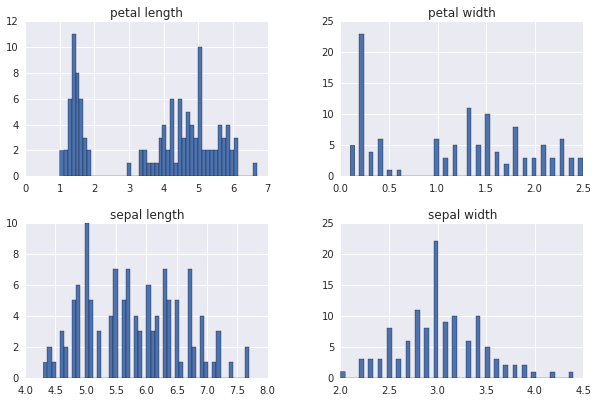

In [19]:
data.hist(figsize=(10, 10), bins=50, layout=(3, 2));

/Users/kegl/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


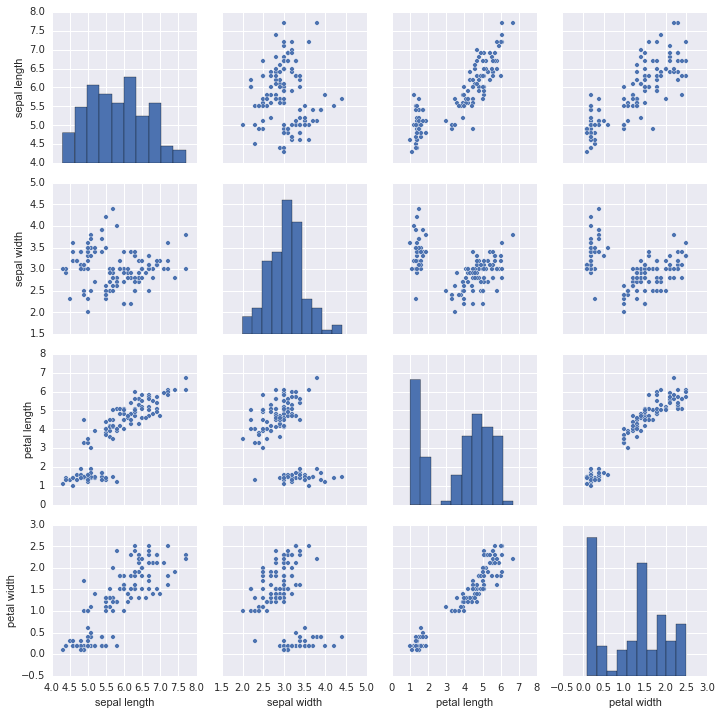

In [20]:
sns.pairplot(data);

## Building predictive models

In [24]:
features = data.drop('species', axis=1)
X = features.values
y = data['species'].values

The initial classifier in your sandbox.

In [25]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.clf = RandomForestClassifier(
            n_estimators=1, max_leaf_nodes=2, random_state=61)
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

The following code mimics the way your submission is tested.

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

skf = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=61)
for valid_train_is, valid_test_is in skf.split(X, y):
    X_valid_train = X[valid_train_is]
    y_valid_train = y[valid_train_is]
    X_valid_test = X[valid_test_is]
    y_valid_test = y[valid_test_is]
    clf = Classifier()
    clf.fit(X_valid_train, y_valid_train)
    y_valid_pred = clf.predict(X_valid_test)
    y_valid_proba = clf.predict_proba(X_valid_test)
    print 'accuracy = ', accuracy_score(y_valid_pred, y_valid_test)

accuracy =  0.583333333333
accuracy =  0.65


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Place the python file <code>classifier.py</code>, the data <code>public_train.csv</code>, and the <code>user_test_submission.py</code></a> in a directory and run 

<code>python user_test_submission.py</code>

If it runs and prints 
<code>
accuracy =  [some_number_between_0_and_1]
accuracy =  [some_number_between_0_and_1]
</code>
you can submit the code.